# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Set up browser
executable_path = {'executable_path': 'C:\\Chrome Drive\\chromedriver-win64\\chromedriver.exe'}
browser = Browser('chrome', **executable_path)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
# Create a BeautifulSoup parser to parse the HTML code
html = browser.html
soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table', class_='table')
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# empty list to store data
data_list1 = []
# Storing all rows into one variable
for row_data in table.find_all('tbody'):
    rows= row_data.find_all('tr')
    row_heading = row_data.find_all('th')
    # print(rows)
    # looping through the table to scrape the data
    for row in rows[1:]:
        id = row.find_all('td')[0].text
        terrestrial_date = row.find_all('td')[1].text
        sol = row.find_all('td')[2].text
        ls = row.find_all('td')[3].text
        month = row.find_all('td')[4].text
        min_temp = row.find_all('td')[5].text
        pressure = row.find_all('td')[6].text
        data_list1.append({
            # "row_heading":row_heading,
            row_heading[0].text : id,
            row_heading[1].text : terrestrial_date,
            row_heading[2].text: sol,
            row_heading[3].text: ls,
            row_heading[4].text : month,
            row_heading[5].text : min_temp,
            row_heading[6].text : pressure
        })

In [7]:
data_list1

[{'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '13',
  'terrestrial_date': '2012-08-17',
  'sol': '11',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '740.0'},
 {'id': '24',
  'terrestrial_date': '2012-08-18',
  'sol': '12',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '741.0'},
 {'id': '35',
  'terrestrial_date': '2012-08-19',
  'sol': '13',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '732.0'},
 {'id': '46',
  'terrestrial_date': '2012-08-20',
  'sol': '14',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '740.0'},
 {'id': '57',
  'terrestrial_date': '2012-08-21',
  'sol': '15',
  'ls': '158',
  'month': '6',
  'min_temp': '-78.0',
  'pressure': '740.0'},
 {'id': '68',
  'terrestrial_date': '2012-08-22',
  'sol': '16',
  'ls': '158',
  'month': '6',
  'min_temp': '-77.0',
  'pressure': '740.0'},


In [8]:
df1 = pd.DataFrame(data_list1)
df1

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
df1.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
df1['terrestrial_date']=pd.to_datetime(df1['terrestrial_date'])
df1[['id','sol','ls','month']]=df1[['id','sol','ls','month']].astype('int64')
df1[['min_temp','pressure']]=df1[['min_temp','pressure']].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
df1.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# How many months exists on Mars
mars_n_months = len(pd.unique(df1['month']))
mars_n_months


12

In [13]:
# 2. How many Martian days' worth of data are there?
mars_days = df1['month'].count()
mars_days

1867

In [14]:
# Determin the coldest and the warmest months on Mars (at the location of curiosity)? 
# Find the average minimum daily temperature for all of the months
avg_min_temp = df1.groupby('month')['min_temp'].mean()
avg_min_temp


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

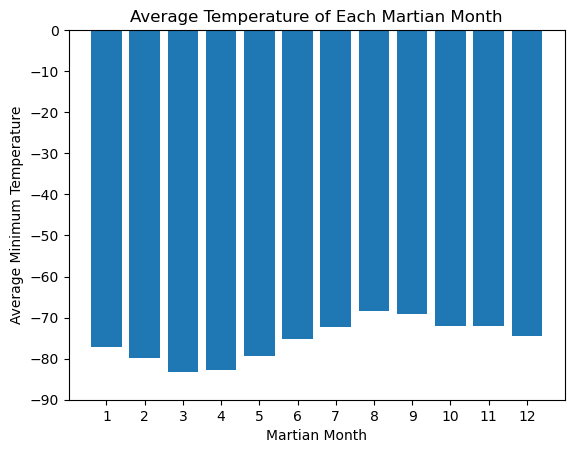

The 3rd month has the coldest average minmum temperature of -83.30729166666667.
The 8th month has the warmest average minmum temperature of -68.38297872340425.


In [15]:
# Use Matplotlib to plot a bar chart
fig = plt.bar(avg_min_temp.index.values, avg_min_temp.values)
# Set title and labels
plt.title("Average Temperature of Each Martian Month")
plt.xlabel('Martian Month')
plt.ylabel('Average Minimum Temperature')
plt.xticks(avg_min_temp.index.values)
plt.ylim(-90,0)
plt.show()
print(f'The 3rd month has the coldest average minmum temperature of {min(avg_min_temp)}.')
print(f'The 8th month has the warmest average minmum temperature of {max(avg_min_temp)}.')


In [16]:
# Determin months having the lowest and the highest atmospheric pressure on Mars
# Find the average daily atomospheric pressure of all the months
avg_pressure = df1.groupby('month')['pressure'].mean()
avg_pressure


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

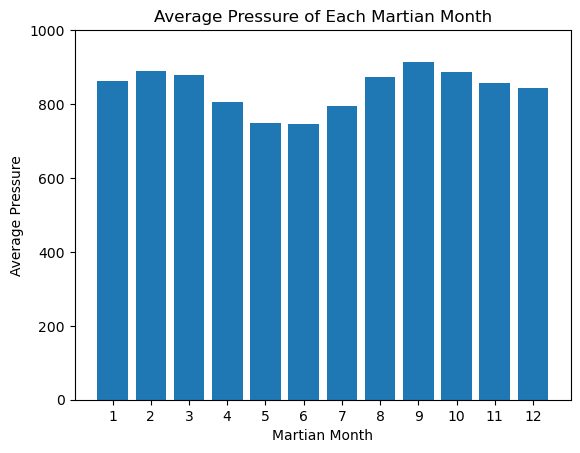

The 6th month has the lowest atmospheric pressure of 745.0544217687075.
The 9th month has the highest atmospheric pressure of 913.3059701492538.


In [17]:
# Plot the results as a bar chart using matplotlip
fig = plt.bar(avg_pressure.index.values, avg_pressure.values)
# Set title and labels
plt.title("Average Pressure of Each Martian Month")
plt.xlabel('Martian Month')
plt.ylabel('Average Pressure')
plt.xticks(avg_pressure.index.values)
plt.ylim(0,1000)
plt.show()
print(f'The 6th month has the lowest atmospheric pressure of {min(avg_pressure)}.')
print(f'The 9th month has the highest atmospheric pressure of {max(avg_pressure)}.')


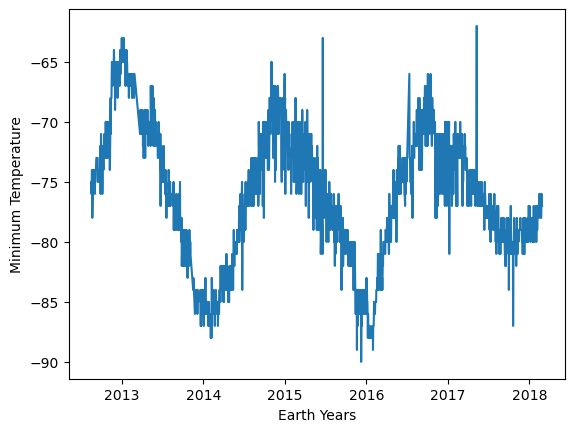

 Roughly 650-675 terrestrial days in a Martian year based on the temperature cycles.


In [18]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Determin terrestrial (Earth) days exist in a Martian year
# Consider how many days elapse on Earth in the time that Mars circles the Sun once.
# Visually estimate the result by plotting the daily minimum temperature.
plt.plot(df1['terrestrial_date'], df1['min_temp'])
plt.xlabel('Earth Years')
plt.ylabel('Minimum Temperature')
plt.show()
print(f' Roughly 650-675 terrestrial days in a Martian year based on the temperature cycles.')

 Roughly 650-675 terrestrial days in a Martian year based on the temperature cycles.


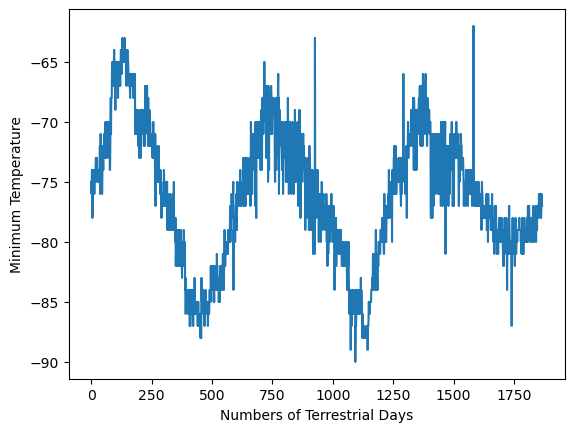

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Determin terrestrial (Earth) days exist in a Martian year
# Consider how many days elapse on Earth in the time that Mars circles the Sun once.
# Visually estimate the result by plotting the daily minimum temperature.
plt.plot(df1['min_temp'])
plt.xlabel("Numbers of Terrestrial Days")
plt.ylabel('Minimum Temperature')
print(f' Roughly 650-675 terrestrial days in a Martian year based on the temperature cycles.')

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [20]:
# Write the data to a CSV
df1.to_csv('../Mod11/mars_fact.csv', index=False)

In [21]:
browser.quit()